# HIGH-LEVEL TURKISH DIPLOMATIC MEETINGS BETWEEN 2009-2020

## Importing Python Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy
import seaborn as sns

## Importing the dataset

In [4]:
df = pd.read_excel('analiz - Copy.xlsx')

In [94]:
df.head()

,STARTS,ENDS,DURATION,YEAR,CATEGORY,COUNTRY,NON_STATE_ACTOR,INTERNATIONAL_ORGANIZATION,MULTILATERAL,1_HEAD_OF_STATE,...,LOCATION,DOCUMENTS,EXTRA,REGION,NATO,EU,NEIGHBORS,SCO,AXIS_RF_CH_IR,OIC
0,2020-12-29,2020-12-29,1,2020,BILATERAL,RUSSIA,NaN,NaN,NaN,0,...,RUSSIA,1,NaN,0,0,0,0,1,1,0
1,2020-12-28,2020-12-28,1,2020,BILATERAL,KOSOVO,NaN,NaN,NaN,0,...,TURKEY,0,NaN,BALKANS,0,0,0,0,0,0
2,2020-12-26,2020-12-26,1,2020,BILATERAL,NaN,LIBYA TRIPOLI GOVERNMENT,NaN,NaN,0,...,LIBYA,0,NaN,0,0,0,0,0,0,0
3,2020-12-23,2020-12-24,2,2020,BILATERAL,SOMALIA,NaN,NaN,NaN,0,...,TURKEY,0,NaN,AFRICA,0,0,0,0,0,1
4,2020-12-23,2020-12-23,1,2020,BILATERAL,KKTC,NaN,NaN,NaN,0,...,TURKEY,0,NaN,0,0,0,1,0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6565 entries, 0 to 6564
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   STARTS                      6565 non-null   datetime64[ns]
 1   ENDS                        6565 non-null   datetime64[ns]
 2   DURATION                    6565 non-null   int64         
 3   YEAR                        6565 non-null   int64         
 4   CATEGORY                    6565 non-null   object        
 5   COUNTRY                     4695 non-null   object        
 6   NON_STATE_ACTOR             301 non-null    object        
 7   INTERNATIONAL_ORGANIZATION  934 non-null    object        
 8   MULTILATERAL                688 non-null    object        
 9   1_HEAD_OF_STATE             6565 non-null   int64         
 10  1_PM                        6565 non-null   int64         
 11  1_MFA                       6565 non-null   int64       

At first, I will only analyze Turkey's bilateral meetings with states based on years. 
So, I will remove irrelevant columns and null rows.

In [308]:
df1 = df.iloc[:, 3:28]

In [309]:
df1 = df1[df1.CATEGORY == 'BILATERAL']

In [310]:
df1.head(1)

,YEAR,CATEGORY,COUNTRY,NON_STATE_ACTOR,INTERNATIONAL_ORGANIZATION,MULTILATERAL,1_HEAD_OF_STATE,1_PM,1_MFA,1_ECON,...,2_PM,2_MFA,2_ECON,2_DEFENSE,2_ENERGY,2_OTHERS,2_LEGISLATION,EXPLANATION,LOCATION,DOCUMENTS
0,2020,BILATERAL,RUSSIA,NaN,NaN,NaN,0,0,1,0,...,0,1,0,0,0,0,0,"Sayın Bakanımız, Türkiye-Rusya Ortak Stratejik...",RUSSIA,1


Drop irrelevant columns

In [311]:
df1.drop(['CATEGORY', 'NON_STATE_ACTOR', 'INTERNATIONAL_ORGANIZATION', 'MULTILATERAL', 'EXPLANATION'], axis = 1, inplace = True)

In [312]:
df1.head()

,YEAR,COUNTRY,1_HEAD_OF_STATE,1_PM,1_MFA,1_ECON,1_DEFENSE,1_ENERGY,1_OTHERS,1_LEGISLATION,2_HEAD_OF_STATES,2_PM,2_MFA,2_ECON,2_DEFENSE,2_ENERGY,2_OTHERS,2_LEGISLATION,LOCATION,DOCUMENTS
0,2020,RUSSIA,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,RUSSIA,1
1,2020,KOSOVO,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,TURKEY,0
2,2020,NaN,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,LIBYA,0
3,2020,SOMALIA,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,TURKEY,0
4,2020,KKTC,0,1,0,0,0,1,1,0,2,0,0,0,0,0,0,0,TURKEY,0


## Drop NULL values

In [313]:
df1 = df1.loc[df1['COUNTRY'].notnull()]

In [314]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4249 entries, 0 to 6563
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   YEAR              4249 non-null   int64 
 1   COUNTRY           4249 non-null   object
 2   1_HEAD_OF_STATE   4249 non-null   int64 
 3   1_PM              4249 non-null   int64 
 4   1_MFA             4249 non-null   int64 
 5   1_ECON            4249 non-null   int64 
 6   1_DEFENSE         4249 non-null   int64 
 7   1_ENERGY          4249 non-null   int64 
 8   1_OTHERS          4249 non-null   int64 
 9   1_LEGISLATION     4249 non-null   int64 
 10  2_HEAD_OF_STATES  4249 non-null   int64 
 11  2_PM              4249 non-null   int64 
 12  2_MFA             4249 non-null   int64 
 13  2_ECON            4249 non-null   int64 
 14  2_DEFENSE         4249 non-null   int64 
 15  2_ENERGY          4249 non-null   int64 
 16  2_OTHERS          4249 non-null   int64 
 17  2_LEGISLATION 

In [315]:
df1.isnull().sum()

YEAR                0
COUNTRY             0
1_HEAD_OF_STATE     0
1_PM                0
1_MFA               0
1_ECON              0
1_DEFENSE           0
1_ENERGY            0
1_OTHERS            0
1_LEGISLATION       0
2_HEAD_OF_STATES    0
2_PM                0
2_MFA               0
2_ECON              0
2_DEFENSE           0
2_ENERGY            0
2_OTHERS            0
2_LEGISLATION       0
LOCATION            1
DOCUMENTS           0
dtype: int64

One row has null value in location column

In [316]:
df1.loc[df1.LOCATION.isnull()]

,YEAR,COUNTRY,1_HEAD_OF_STATE,1_PM,1_MFA,1_ECON,1_DEFENSE,1_ENERGY,1_OTHERS,1_LEGISLATION,2_HEAD_OF_STATES,2_PM,2_MFA,2_ECON,2_DEFENSE,2_ENERGY,2_OTHERS,2_LEGISLATION,LOCATION,DOCUMENTS
4731,2013,POLAND,0,0,3,0,0,0,0,0,0,0,3,0,0,0,0,0,NaN,0


In [317]:
df[(df.YEAR == 2013) & (df.COUNTRY == 'POLAND') & (df['1_MFA'] == 3)]

,STARTS,ENDS,DURATION,YEAR,CATEGORY,COUNTRY,NON_STATE_ACTOR,INTERNATIONAL_ORGANIZATION,MULTILATERAL,1_HEAD_OF_STATE,...,LOCATION,DOCUMENTS,EXTRA,REGION,NATO,EU,NEIGHBORS,SCO,AXIS_RF_CH_IR,OIC
4731,2013-01-25,2013-01-25,1,2013,BILATERAL,POLAND,NaN,NaN,NaN,0,...,NaN,0,NaN,0,1,1,0,0,0,0


I have checked the data in this row from the Turkish MFA website. It is actually irrelevant. So, I dropped this row too.

In [318]:
df1.drop(4731, axis=0, inplace = True)

In [319]:
df1.isnull().sum()

YEAR                0
COUNTRY             0
1_HEAD_OF_STATE     0
1_PM                0
1_MFA               0
1_ECON              0
1_DEFENSE           0
1_ENERGY            0
1_OTHERS            0
1_LEGISLATION       0
2_HEAD_OF_STATES    0
2_PM                0
2_MFA               0
2_ECON              0
2_DEFENSE           0
2_ENERGY            0
2_OTHERS            0
2_LEGISLATION       0
LOCATION            0
DOCUMENTS           0
dtype: int64

## At Least One Foreign Representative

For this analysis, it is important to observe how many high-level meetings Turkey have made in the last ten years. The foreign counterpart or delegation should necessarily be a high-level official while the Turkish representative may not. Thus, I will seek at least one non-zero value between columns 2 to 9.

In [320]:
df1 = df1[(df1['1_HEAD_OF_STATE'] != 0) | (df1['1_PM'] != 0) | (df1['1_MFA'] != 0) | (df1['1_ECON'] != 0) | (df1['1_DEFENSE'] != 0) | (df1['1_ENERGY'] != 0) | (df1['1_OTHERS'] != 0) | (df1['1_LEGISLATION'] != 0)]

In [321]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3982 entries, 0 to 6563
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   YEAR              3982 non-null   int64 
 1   COUNTRY           3982 non-null   object
 2   1_HEAD_OF_STATE   3982 non-null   int64 
 3   1_PM              3982 non-null   int64 
 4   1_MFA             3982 non-null   int64 
 5   1_ECON            3982 non-null   int64 
 6   1_DEFENSE         3982 non-null   int64 
 7   1_ENERGY          3982 non-null   int64 
 8   1_OTHERS          3982 non-null   int64 
 9   1_LEGISLATION     3982 non-null   int64 
 10  2_HEAD_OF_STATES  3982 non-null   int64 
 11  2_PM              3982 non-null   int64 
 12  2_MFA             3982 non-null   int64 
 13  2_ECON            3982 non-null   int64 
 14  2_DEFENSE         3982 non-null   int64 
 15  2_ENERGY          3982 non-null   int64 
 16  2_OTHERS          3982 non-null   int64 
 17  2_LEGISLATION 

## All Meetings

### Turkey's all meetings in the last decade

Groupby by countries

In [322]:
all_meetings = df1.groupby('COUNTRY').count().sort_values(by = ['1_PM'], ascending = False)
all_meetings.head(10)

,YEAR,1_HEAD_OF_STATE,1_PM,1_MFA,1_ECON,1_DEFENSE,1_ENERGY,1_OTHERS,1_LEGISLATION,2_HEAD_OF_STATES,2_PM,2_MFA,2_ECON,2_DEFENSE,2_ENERGY,2_OTHERS,2_LEGISLATION,LOCATION,DOCUMENTS
COUNTRY,,,,,,,,,,,,,,,,,,,
USA,196,196,196,196,196,196,196,196,196,196,196,196,196,196,196,196,196,196,196
IRAN,143,143,143,143,143,143,143,143,143,143,143,143,143,143,143,143,143,143,143
IRAQ,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138
RUSSIA,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134
GERMANY,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128
KKTC,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121
QATAR,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114
AZERBAIJAN,111,111,111,111,111,111,111,111,111,111,111,111,111,111,111,111,111,111,111
UK,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84


Since all columns have same values, I will keep only one column

In [341]:
all_meetings = all_meetings.iloc[:,:1]

I will convert the index to a column

In [342]:
all_meetings['COUNTRY'] = all_meetings.index

<ipython-input-342-62c43f32d7b0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_meetings['COUNTRY'] = all_meetings.index


In [346]:
all_meetings.rename(columns = {'YEAR': 'Count'}, inplace = True)

/Users/azize/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [349]:
all_meetings.reset_index(drop=True, inplace=True)
all_meetings.head(3)

,Count,COUNTRY
0,196,USA
1,143,IRAN
2,138,IRAQ


## All Meetings Bar Plot

Since KKTC is recognized only by Turkey, number of Turkish-KKTC meetings is unsurprisingly high. This can be misleading for our analysis because Turkey is the only country that KKTC has diplomatic relations. Thus, I will drop KKTC from this analysis.

In [323]:
all_top10 = all_meetings[all_meetings.index != 'KKTC'].iloc[0:10,:]

In [241]:
sns.set_theme(style="darkgrid")

In [514]:
plt.figure(figsize=(25,20))

<Figure size 1800x1440 with 0 Axes>

<Figure size 1800x1440 with 0 Axes>

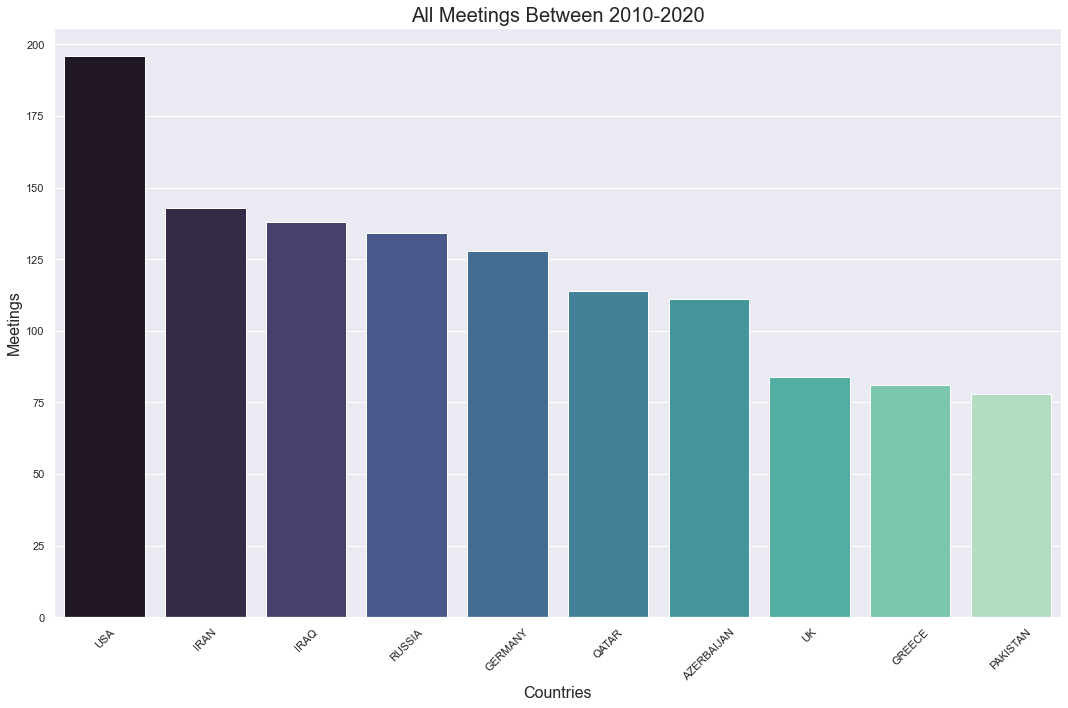

In [517]:
plt.figure(figsize=(15,10))
ax = sns.barplot(x=all_top10.index, y="1_PM", data=all_top10, palette = 'mako')
plt.xticks(rotation=45)
ax.set_title('All Meetings Between 2010-2020', fontsize= 20)
ax.set_ylabel('Meetings', fontsize= 16)
ax.set_xlabel('Countries', fontsize= 16)
plt.tight_layout()

### Yearly Meeting Graphic (Lineplot)

Yearly sum of meetings

In [552]:
years = df1.groupby('YEAR').count().iloc[:, :1]
years

,COUNTRY
YEAR,
2010,344
2011,289
2012,382
2013,310
2014,397
2015,368
2016,394
2017,416
2018,406


In [554]:
years.rename(columns={'COUNTRY': 'Total'}, inplace = True)

Presidential Meetings

In [551]:
pres = df1[df1['2_HEAD_OF_STATES'] == 1].groupby('YEAR').count().iloc[:,:1]
pres

,COUNTRY
YEAR,
2010,88
2011,75
2012,80
2013,53
2014,89
2015,103
2016,126
2017,120
2018,82


In [555]:
pres.rename(columns={'COUNTRY': 'President'}, inplace = True)

Merge two tables

In [558]:
yearly_sum = years.merge(pres,on=pres.index)
yearly_sum

,key_0,Total,President
0,2010,344,88
1,2011,289,75
2,2012,382,80
3,2013,310,53
4,2014,397,89
5,2015,368,103
6,2016,394,126
7,2017,416,120
8,2018,406,82
9,2019,442,95


In [559]:
yearly_sum.rename(columns={'key_0': 'Years'}, inplace = True) #I have changed the name of key_0 column to year.

In [563]:
yearly_sum

,Years,Total,President
0,2010,344,88
1,2011,289,75
2,2012,382,80
3,2013,310,53
4,2014,397,89
5,2015,368,103
6,2016,394,126
7,2017,416,120
8,2018,406,82
9,2019,442,95


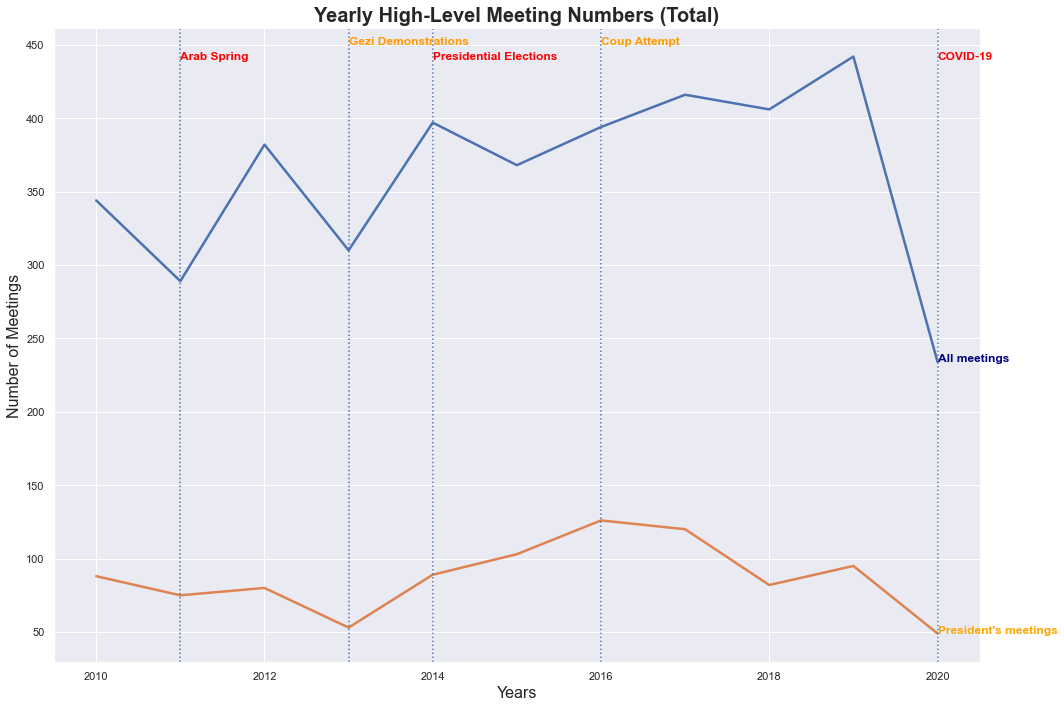

In [586]:
plt.figure(figsize=(15,10))
sns.lineplot(data=yearly_sum, x="Years", y="Total", palette = 'Blue', markers = True, linewidth=2.5).set_title('Yearly High-Level Meeting Numbers (Total)', fontsize= 20, fontweight= 'bold')
sns.lineplot(data=yearly_sum, x="Years", y="President", palette = 'Red', markers = True, linewidth=2.5)
plt.xlabel("Years", fontsize= 16)
plt.ylabel("Number of Meetings", fontsize= 16)
plt.axvline(x=2011,linestyle=':')
plt.text(x = 2011, y=440, s= "Arab Spring", c='red', fontweight= 'bold')
plt.axvline(x=2013,linestyle=':')
plt.text(x = 2013, y=450, s= "Gezi Demonstrations", c='#FF9B00', fontweight= 'bold')
plt.axvline(x=2014,linestyle=':')
plt.text(x = 2014, y=440, s= "Presidential Elections", c='red', fontweight= 'bold')
plt.axvline(x=2016,linestyle=':')
plt.text(x = 2016, y=450, s= "Coup Attempt", c='#FF9B00', fontweight= 'bold')
plt.axvline(x=2020,linestyle=':')
plt.text(x = 2020, y=440, s= "COVID-19", c='red', fontweight= 'bold')
plt.text(x = 2020, y=49, s= "President's meetings", c='orange', fontweight= 'bold')
plt.text(x = 2020, y=234, s= "All meetings", c='navy', fontweight= 'bold')
plt.tight_layout()

## Visualization on the World Map

Hua Shi's geopandas tutorial (https://melaniesoek0120.medium.com/data-visualization-how-to-plot-a-map-with-geopandas-in-python-73b10dcd4b4b) has helped me a lot although it has some problems. I have taken below function from her blog.

For the map, we need geometry, latitude, and longitude data which I will import from other sources and merge with my all_meetings dataframe. But country names are written in different ways in different datasets. Thus, in order to merge geographical data with my dataframe, I need standardized ISO country codes.

### Importing ISO Country Codes

In [245]:
import pycountry #for 3-digit and 2-digit iso country codes

In [246]:
def alpha3code(column):
    CODE=[]
    for country in column:
        try:
            code=pycountry.countries.get(name=country).alpha_3
           # .alpha_3 means 3-letter country code
            CODE.append(code)
        except:
            CODE.append('None')
    return CODE

In [352]:
all_meetings.head(3)

,Count,COUNTRY,CODE
0,196,USA,None
1,143,IRAN,None
2,138,IRAQ,IRQ


In [350]:
# create a column for code 
all_meetings['CODE']=alpha3code(all_meetings.COUNTRY)
all_meetings.head()

<ipython-input-350-574b200461d1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_meetings['CODE']=alpha3code(all_meetings.COUNTRY)


,Count,COUNTRY,CODE
0,196,USA,None
1,143,IRAN,None
2,138,IRAQ,IRQ
3,134,RUSSIA,None
4,128,GERMANY,DEU


Check which countries' names have returned 'None'.

In [353]:
all_meetings[all_meetings['CODE'] == 'None'].COUNTRY.unique()

array(['USA', 'IRAN', 'RUSSIA', 'KKTC', 'UK', 'KOSOVO', 'MOLDOVA',
       'VENEZUELA', 'PALESTINE', 'SOUTH KOREA', 'SYRIA', 'UAE',
       'TANZANIA', 'IVORY COAST', 'REPUBLIC OF CONGO', 'VIETNAM',
       'GUINEA BISSAU', 'BRUNEI', 'BOLIVIA', 'VATICAN',
       'DEMOCRATIC REPUBLIC OF CONGO', 'LETONIA', 'LAOS', 'FAROE ISLAND',
       'ST VINCENT AND THE GRENADINES', 'CAPE VERDE'], dtype=object)

In [249]:
list(pycountry.countries)

[Country(alpha_2='AW', alpha_3='ABW', flag='🇦🇼', name='Aruba', numeric='533'),
 Country(alpha_2='AF', alpha_3='AFG', flag='🇦🇫', name='Afghanistan', numeric='004', official_name='Islamic Republic of Afghanistan'),
 Country(alpha_2='AO', alpha_3='AGO', flag='🇦🇴', name='Angola', numeric='024', official_name='Republic of Angola'),
 Country(alpha_2='AI', alpha_3='AIA', flag='🇦🇮', name='Anguilla', numeric='660'),
 Country(alpha_2='AX', alpha_3='ALA', flag='🇦🇽', name='Åland Islands', numeric='248'),
 Country(alpha_2='AL', alpha_3='ALB', flag='🇦🇱', name='Albania', numeric='008', official_name='Republic of Albania'),
 Country(alpha_2='AD', alpha_3='AND', flag='🇦🇩', name='Andorra', numeric='020', official_name='Principality of Andorra'),
 Country(alpha_2='AE', alpha_3='ARE', flag='🇦🇪', name='United Arab Emirates', numeric='784'),
 Country(alpha_2='AR', alpha_3='ARG', flag='🇦🇷', name='Argentina', numeric='032', official_name='Argentine Republic'),
 Country(alpha_2='AM', alpha_3='ARM', flag='🇦🇲', 

I will manually replace country names with names in the pycountry list.

In [354]:
all_meetings.replace(['BOLIVIA', 'BRUNEI', 'CAPE VERDE', 'DEMOCRATIC REPUBLIC OF CONGO', 'FAROE ISLAND', 'GUINEA BISSAU', 'IRAN', 'IVORY COAST', 'LAOS', 'LETONIA', 'MOLDOVA', 'PALESTINE', 'REPUBLIC OF CONGO', 'RUSSIA', 'SOUTH KOREA', 'ST VINCENT AND THE GRENADINES', 'SYRIA', 'TANZANIA', 'UAE', 'UK', 'USA', 'VATICAN', 'VENEZUELA', 'VIETNAM'],
           ['Bolivia, Plurinational State of', 'Brunei Darussalam', 'Cabo Verde', 'Congo, The Democratic Republic of the', 'Faroe Islands', 'Guinea-Bissau', 'Iran, Islamic Republic of', "Côte d'Ivoire", "Lao People's Democratic Republic", 'Latvia', 'Moldova, Republic of', 'Palestine, State of', 'Congo', 'Russian Federation', 'Korea, Republic of', 'Saint Vincent and the Grenadines', 'Syrian Arab Republic', 'Tanzania, United Republic of', 'United Arab Emirates', 'United Kingdom', 'United States', 'Holy See (Vatican City State)', 'Venezuela, Bolivarian Republic of', 'Viet Nam'], inplace = True)

/Users/azize/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4524: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [357]:
all_meetings['CODE']=alpha3code(all_meetings.COUNTRY)

<ipython-input-357-2d108b7eec58>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_meetings['CODE']=alpha3code(all_meetings.COUNTRY)


KKTC and Kosovo are not included in the pycountry list. I will add them manually.

In [358]:
all_meetings[all_meetings['CODE'] == 'None'].COUNTRY.unique()

array(['KKTC', 'KOSOVO'], dtype=object)

In [359]:
all_meetings.loc[all_meetings['COUNTRY'] == 'KOSOVO', 'CODE'] = 'XKX'

/Users/azize/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [360]:
all_meetings[all_meetings['COUNTRY'] == 'KKTC']

,Count,COUNTRY,CODE
5,121,KKTC,None


In [361]:
all_meetings.loc[all_meetings['COUNTRY'] == 'KKTC', 'CODE'] = 'KKTC' 

/Users/azize/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


Since KKTC is not officially recognized other than Turkey, it has not a separate iso code. So, I just assigned its abbreviation as a code to see whole world map.

In [362]:
all_meetings[all_meetings['CODE'] == 'None'].COUNTRY.unique() #Now, all countries have their country codes.

array([], dtype=object)

### Importing Geopandas World Map

In [258]:
import geopandas

In [259]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

In [128]:
world.head(3)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."


In [260]:
world.columns=['pop_est', 'continent', 'name', 'CODE', 'gdp_md_est', 'geometry']

In [215]:
world.CODE.unique()

array(['FJI', 'TZA', 'ESH', 'CAN', 'USA', 'KAZ', 'UZB', 'PNG', 'IDN',
       'ARG', 'CHL', 'COD', 'SOM', 'KEN', 'SDN', 'TCD', 'HTI', 'DOM',
       'RUS', 'BHS', 'FLK', '-99', 'GRL', 'ATF', 'TLS', 'ZAF', 'LSO',
       'MEX', 'URY', 'BRA', 'BOL', 'PER', 'COL', 'PAN', 'CRI', 'NIC',
       'HND', 'SLV', 'GTM', 'BLZ', 'VEN', 'GUY', 'SUR', 'ECU', 'PRI',
       'JAM', 'CUB', 'ZWE', 'BWA', 'NAM', 'SEN', 'MLI', 'MRT', 'BEN',
       'NER', 'NGA', 'CMR', 'TGO', 'GHA', 'CIV', 'GIN', 'GNB', 'LBR',
       'SLE', 'BFA', 'CAF', 'COG', 'GAB', 'GNQ', 'ZMB', 'MWI', 'MOZ',
       'SWZ', 'AGO', 'BDI', 'ISR', 'LBN', 'MDG', 'PSE', 'GMB', 'TUN',
       'DZA', 'JOR', 'ARE', 'QAT', 'KWT', 'IRQ', 'OMN', 'VUT', 'KHM',
       'THA', 'LAO', 'MMR', 'VNM', 'PRK', 'KOR', 'MNG', 'IND', 'BGD',
       'BTN', 'NPL', 'PAK', 'AFG', 'TJK', 'KGZ', 'TKM', 'IRN', 'SYR',
       'ARM', 'SWE', 'BLR', 'UKR', 'POL', 'AUT', 'HUN', 'MDA', 'ROU',
       'LTU', 'LVA', 'EST', 'DEU', 'BGR', 'GRC', 'TUR', 'ALB', 'HRV',
       'CHE', 'LUX',

In [218]:
world[world.CODE== '-99'] #Some country codes are written as -99. I will change them manually.

,pop_est,continent,name,CODE,gdp_md_est,geometry
21,5320045,Europe,Norway,-99,364700.0,"MULTIPOLYGON (((15.14282 79.67431, 15.52255 80..."
43,67106161,Europe,France,-99,2699000.0,"MULTIPOLYGON (((-51.65780 4.15623, -52.24934 3..."
160,265100,Asia,N. Cyprus,-99,3600.0,"POLYGON ((32.73178 35.14003, 32.80247 35.14550..."
167,3500000,Africa,Somaliland,-99,12250.0,"POLYGON ((48.94820 11.41062, 48.94820 11.41062..."
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."


In [302]:
world.loc[world['name'] == 'France', 'CODE'] = 'FRA'

In [301]:
world.loc[world['name'] == 'Norway', 'CODE'] = 'NOR'

In [300]:
world.loc[world['name'] == 'Kosovo', 'CODE'] = 'XKX'

In [366]:
world.loc[world['name'] == 'N. Cyprus', 'CODE'] = 'KKTC'

In [367]:
world.loc[world['name'] == 'Somaliland', 'CODE'] = 'SOM2'

In [368]:
world[world.CODE== '-99']

,pop_est,continent,name,CODE,gdp_md_est,geometry


### Merging 'all_meetings' with 'world' as wmap

In [465]:
wmap = world.merge(all_meetings, on = 'CODE', how = 'left')
wmap.head()

,pop_est,continent,name,CODE,gdp_md_est,geometry,Count,COUNTRY,CODE2
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",NaN,NaN,NaN
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",10.0,"Tanzania, United Republic of",TZ
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN,NaN
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",33.0,CANADA,CA
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",196.0,United States,US


### Importing Latitude and Longitude Data

In her tutorial, Hua Shi uses the data in this address ('https://raw.githubusercontent.com/melanieshi0120/COVID-19_global_time_series_panel_data/master/data/countries_latitude_longitude.csv'). But this lacks some countries like France and Norway. So I looked for another source and found this ('https://developers.google.com/public-data/docs/canonical/countries_csv'). But this table have 2-digit codes, not 3-digit. So now I have to add 2-digit codes to my dataset.

#### Add a new column for 2 digit codes

In [442]:
def alpha2code(column):
    CODE2=[]
    for country in column:
        try:
            code=pycountry.countries.get(alpha_3=country).alpha_2 
           # .alpha_2 means 2-letter country code
            CODE2.append(code)
        except:
            CODE2.append('None')
    return CODE2

In [466]:
wmap['CODE2']=alpha2code(wmap.CODE)
wmap.head(3)

,pop_est,continent,name,CODE,gdp_md_est,geometry,Count,COUNTRY,CODE2
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",NaN,NaN,FJ
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",10.0,"Tanzania, United Republic of",TZ
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN,EH


In [467]:
wmap[wmap.CODE2.isnull()]

,pop_est,continent,name,CODE,gdp_md_est,geometry,Count,COUNTRY,CODE2


In [468]:
wmap[wmap.CODE2 == 'None']

,pop_est,continent,name,CODE,gdp_md_est,geometry,Count,COUNTRY,CODE2
161,265100,Asia,N. Cyprus,KKTC,3600.0,"POLYGON ((32.73178 35.14003, 32.80247 35.14550...",121.0,KKTC,None
168,3500000,Africa,Somaliland,SOM2,12250.0,"POLYGON ((48.94820 11.41062, 48.94820 11.41062...",NaN,NaN,None
175,1895250,Europe,Kosovo,XKX,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",45.0,KOSOVO,None


In [469]:
wmap.loc[wmap['name'] == 'N. Cyprus', 'CODE2'] = 'KKTC2'

In [470]:
wmap.loc[wmap['name'] == 'Somaliland', 'CODE2'] = 'SOM2'

In [471]:
wmap.loc[wmap['name'] == 'Kosovo', 'CODE2'] = 'XK'

In [472]:
wmap[wmap.CODE2 == 'None']

,pop_est,continent,name,CODE,gdp_md_est,geometry,Count,COUNTRY,CODE2


### Replacing Nan values with zero

Since I have added new countries to my table, some rows have NaN Count value. I will convert them to zero.

In [473]:
wmap.isnull().value_counts()

pop_est  continent  name   CODE   gdp_md_est  geometry  Count  COUNTRY  CODE2
False    False      False  False  False       False     False  False    False    159
                                                        True   True     False     19
dtype: int64

In [474]:
wmap.fillna(0, inplace = True)

In [475]:
wmap.isnull().value_counts()

pop_est  continent  name   CODE   gdp_md_est  geometry  Count  COUNTRY  CODE2
False    False      False  False  False       False     False  False    False    178
dtype: int64

#### Drop unnecessary columns

In [476]:
wmap.drop(columns = ['pop_est', 'COUNTRY'], inplace = True)

In [477]:
wmap.head()

,continent,name,CODE,gdp_md_est,geometry,Count,CODE2
0,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",0.0,FJ
1,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",10.0,TZ
2,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",0.0,EH
3,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",33.0,CA
4,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",196.0,US


#### Importing longitude and latitude Table

In [478]:
tables = pd.read_html('https://developers.google.com/public-data/docs/canonical/countries_csv')

In [479]:
table = tables[0]
table.head()

,country,latitude,longitude,name
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla


In [481]:
#Before merging with wmap dataframe, I have changed country column's name to 'CODE2'
table.rename(columns = {'country': 'CODE2'}, inplace = True)

#### Merge wmap with table

In [482]:
merged=wmap.merge(table,on='CODE2', how = 'left').sort_values(by=['Count'],ascending=False).reset_index()
merged.head()

,index,continent,name_x,CODE,gdp_md_est,geometry,Count,CODE2,latitude,longitude,name_y
0,4,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",196.0,US,37.090240,-95.712891,United States
1,107,Asia,Iran,IRN,1459000.0,"POLYGON ((48.56797 29.92678, 48.01457 30.45246...",143.0,IR,32.427908,53.688046,Iran
2,87,Asia,Iraq,IRQ,596700.0,"POLYGON ((39.19547 32.16101, 38.79234 33.37869...",138.0,IQ,33.223191,43.679291,Iraq
3,18,Europe,Russia,RUS,3745000.0,"MULTIPOLYGON (((178.72530 71.09880, 180.00000 ...",134.0,RU,61.524010,105.318756,Russia
4,122,Europe,Germany,DEU,3979000.0,"POLYGON ((14.11969 53.75703, 14.35332 53.24817...",128.0,DE,51.165691,10.451526,Germany


In [483]:
merged.isnull().value_counts()

index  continent  name_x  CODE   gdp_md_est  geometry  Count  CODE2  latitude  longitude  name_y
False  False      False   False  False       False     False  False  False     False      False     174
                                                                     True      True       True        4
dtype: int64

#### Check rows with no latitude or longitude data

In [488]:
merged[merged.latitude.isnull()]

,index,continent,name_x,CODE,gdp_md_est,geometry,Count,CODE2,latitude,longitude,name_y
5,161,Asia,N. Cyprus,KKTC,3600.0,"POLYGON ((32.73178 35.14003, 32.80247 35.14550...",121.0,KKTC2,NaN,NaN,NaN
130,177,Africa,S. Sudan,SSD,20880.0,"POLYGON ((30.83385 3.50917, 29.95350 4.17370, ...",4.0,SS,NaN,NaN,NaN
140,50,Africa,Namibia,NAM,25990.0,"POLYGON ((19.89577 -24.76779, 19.89473 -28.461...",3.0,NA,NaN,NaN,NaN
166,168,Africa,Somaliland,SOM2,12250.0,"POLYGON ((48.94820 11.41062, 48.94820 11.41062...",0.0,SOM2,NaN,NaN,NaN


Add absent values manually

In [493]:
wmap.loc[wmap['CODE'] == 'KKTC', 'latitude'] = 35.248036
wmap.loc[wmap['CODE'] == 'KKTC', 'longitude'] = 33.657724

In [495]:
wmap.loc[wmap['CODE'] == 'SSD', 'latitude'] = 6.876991
wmap.loc[wmap['CODE'] == 'SSD', 'longitude'] = 31.306978

In [497]:
wmap.loc[wmap['CODE'] == 'NAM', 'latitude'] = -22.95764
wmap.loc[wmap['CODE'] == 'NAM', 'longitude'] = 18.490409

#### Plot the map

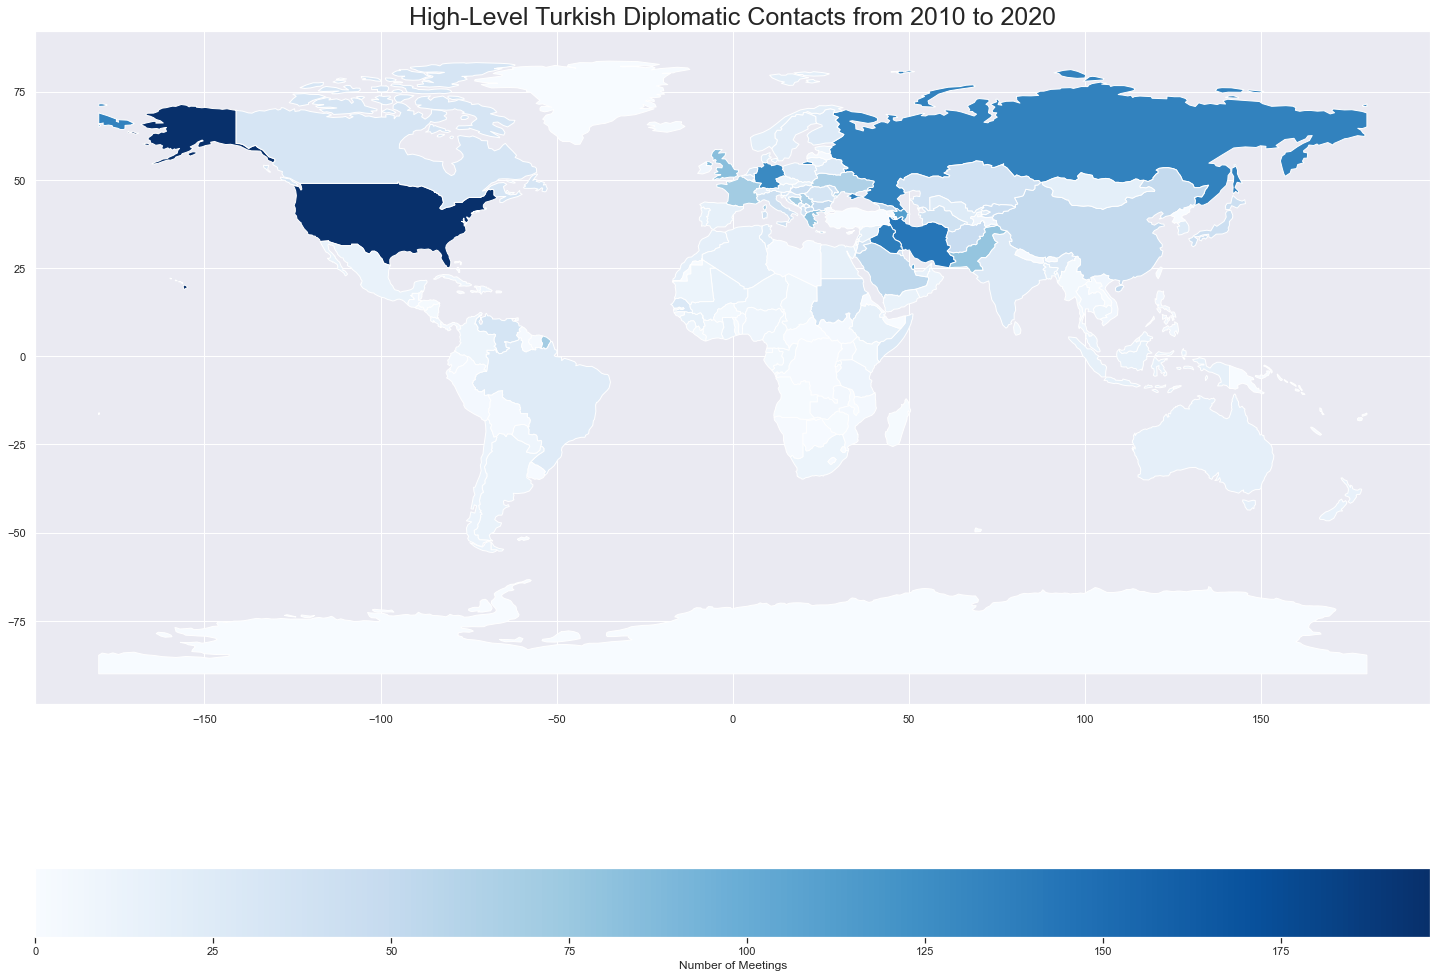

In [512]:
merged.plot(column='Count',
           figsize=(25, 20),
           legend=True,cmap='Blues', k = 20, legend_kwds={"label": "Number of Meetings", "orientation":"horizontal"})
plt.title('High-Level Turkish Diplomatic Contacts from 2010 to 2020',fontsize=25);